In [12]:
# data library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# skleran library
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Problem 1

## Data preprocessing 

In [2]:
## load data
df1 = pd.read_csv(r'ionosphere.data', header = None)

In [3]:
## check if exists missing vlaue
sum(df1.isnull().sum())

0

In [4]:
## get the training x
df1_x = df1.iloc[:, :34]

## change the catergory from str to int, 1 means g, 0 means b
def strtoint(x):
    return 1 if x=='g' else 0
df1_y = df1.iloc[:, 34].apply(strtoint)

## standardlize data
df1_x_std = MinMaxScaler().fit_transform(df1_x)

In [5]:
df1_x_std

array([[1.      , 0.      , 0.997695, ..., 0.227565, 0.593205, 0.2735  ],
       [1.      , 0.      , 1.      , ..., 0.46856 , 0.43131 , 0.487765],
       [1.      , 0.      , 1.      , ..., 0.3791  , 0.780225, 0.30881 ],
       ...,
       [1.      , 0.      , 0.973505, ..., 0.50221 , 0.963485, 0.497115],
       [1.      , 0.      , 0.95304 , ..., 0.481215, 0.937015, 0.418785],
       [1.      , 0.      , 0.92355 , ..., 0.46661 , 0.92882 , 0.469245]])

In [6]:
## randomly split the data 
x_train1, x_test1, y_train1, y_test1 = train_test_split(df1_x, df1_y, test_size = 0.2)

## SVC implementation 

In [7]:
import warnings
warnings.filterwarnings('ignore') 

# intialize the grid
param_grid1 = {'C': [2**-5, 2**-3, 2**-1, 2**1, 2**3, 2**5, 2**7, 2**9, 2**11, 2**13, 2**15], \
   'gamma': [2**-15, 2**-13, 2**-11, 2**-9, 2**-7, 2**-5, 2**-3, 2**-1, 2**1, 2**3], 'kernel': ['rbf']}

## using accuracy as performance 
score = 'accuracy'

print("# Tuning hyper-parameters for %s" % score)
print()

clf = GridSearchCV(SVC(), param_grid1, cv=5, scoring=score)
clf.fit(x_train1, y_train1)

print("Best parameters set found on development set:")
print()
print(clf.best_params_, clf.best_score_)
print()

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
params = clf.cv_results_['params']

## DataFrame
d = {}

idx = param_grid1['gamma']

for mean, std, params in zip(means, stds, params):
    if params['C'] not in d.keys():
        d[params['C']] = [mean]
    else:
        d[params['C']].append(mean)

df_score = pd.DataFrame(d, index=idx)
df_score

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'C': 8, 'gamma': 0.125, 'kernel': 'rbf'} 0.9678571428571429



,0.03125,0.125,0.5,2.0,8.0,32.0,128.0,512.0,2048.0,8192.0,32768.0
0.000031,0.657143,0.657143,0.657143,0.657143,0.657143,0.657143,0.760714,0.871429,0.882143,0.885714,0.885714
0.000122,0.657143,0.657143,0.657143,0.657143,0.657143,0.760714,0.871429,0.885714,0.882143,0.882143,0.892857
0.000488,0.657143,0.657143,0.657143,0.657143,0.760714,0.875000,0.889286,0.910714,0.907143,0.907143,0.903571
0.001953,0.657143,0.657143,0.657143,0.760714,0.892857,0.921429,0.921429,0.917857,0.921429,0.910714,0.900000
0.007812,0.657143,0.657143,0.764286,0.903571,0.932143,0.939286,0.932143,0.935714,0.917857,0.896429,0.864286
0.031250,0.657143,0.714286,0.921429,0.953571,0.950000,0.957143,0.950000,0.935714,0.896429,0.896429,0.896429
0.125000,0.657143,0.946429,0.946429,0.953571,0.967857,0.957143,0.917857,0.917857,0.917857,0.917857,0.917857
0.500000,0.657143,0.678571,0.932143,0.953571,0.939286,0.939286,0.939286,0.939286,0.939286,0.939286,0.939286
2.000000,0.657143,0.657143,0.675000,0.903571,0.903571,0.903571,0.903571,0.903571,0.903571,0.903571,0.903571
8.000000,0.657143,0.657143,0.660714,0.671429,0.671429,0.671429,0.671429,0.671429,0.671429,0.671429,0.671429


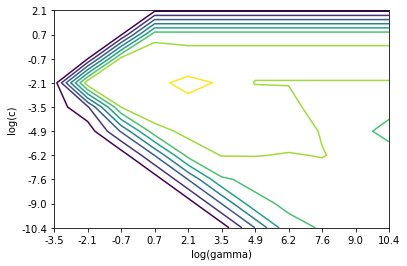

In [8]:
# plot contour map 
plt.contour(df_score)
plt.xticks(np.arange(11), ['{0:.1f}'.format(np.log(x)) for x in df_score.columns.values])
plt.yticks(np.arange(10), ['{0:.1f}'.format(np.log(x)) for x in df_score.index])
plt.xlabel('log(gamma)')
plt.ylabel('log(c)')
plt.show()

In [13]:
## find grid search

# intialize the grid
param_grid1 = {'C': [2**(1+i/100) for i in range(0,425,25)], \
               'gamma': [2**(-(1+i/100)) for i in range(0,425,25)], 'kernel': ['rbf']}

# performance score
scores = 'accuracy'

print("# Tuning hyper-parameters for %s" % score)
print()

clf = GridSearchCV(SVC(), param_grid1, cv=5, scoring = score)
clf.fit(x_train1, y_train1)

print("Best parameters set found on development set:")
print()
print(clf.best_params_, clf.best_score_)
print()
print("Grid scores on development set:")
print()


means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
params = clf.cv_results_['params']


print("Detailed classification report:")
print("The classification report")
print()
y_true, y_pred = y_test1, clf.predict(x_test1)
print(classification_report(y_true, y_pred))
print()
print("The accuracy score is %.4f" % accuracy_score(y_true, y_pred))
print()

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'C': 6.727171322029716, 'gamma': 0.07432544468767006, 'kernel': 'rbf'} 0.975

Grid scores on development set:

Detailed classification report:
The classification report

             precision    recall  f1-score   support

          0       0.93      0.83      0.88        30
          1       0.89      0.95      0.92        41

avg / total       0.90      0.90      0.90        71


The accuracy score is 0.9014



# Problem 2

In [14]:
## load data
df2 = pd.read_csv(r'vowel-context.data', sep='\s+', header = None)

In [15]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,0,0,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814,0
1,0,0,0,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488,1
2,0,0,0,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049,2
3,0,0,0,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795,3
4,0,0,0,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396,4


In [16]:
df2.shape

(990, 14)

In [17]:
# checking missing values
sum(df2.isnull().sum())

0

In [18]:
## get the training x
df2_x = df2.iloc[:, 3:13]
df2_y = df2.iloc[:, 13]

## standardlize data
df2_x_std = MinMaxScaler().fit_transform(df2_x)

In [19]:
## randomly split the data 
x_train2, x_test2, y_train2, y_test2 = train_test_split(df2_x, df2_y, test_size = 0.2)

## SVC implementation
import warnings
warnings.filterwarnings('ignore') 

# intialize the grid
param_grid2 = {'C': [2**-5, 2**-3, 2**-1, 2**1, 2**3, 2**5, 2**7, 2**9, 2**11, 2**13, 2**15], \
   'gamma': [2**-15, 2**-13, 2**-11, 2**-9, 2**-7, 2**-5, 2**-3, 2**-1, 2**1, 2**3], 'kernel': ['rbf']}

# performance score
score = 'accuracy'

print("# Tuning hyper-parameters for %s" % score)
print()

clf = GridSearchCV(SVC(), param_grid2, cv=5, scoring=score)
clf.fit(x_train2, y_train2)

print("Best parameters set found on development set:")
print()
print(clf.best_params_, clf.best_score_)
print()

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
params = clf.cv_results_['params']

## DataFrame
d = {}

idx = param_grid2['gamma']

for mean, std, params in zip(means, stds, params):
    if params['C'] not in d.keys():
        d[params['C']] = [mean]
    else:
        d[params['C']].append(mean)

df_score = pd.DataFrame(d, index=idx)
df_score

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'C': 8, 'gamma': 0.5, 'kernel': 'rbf'} 0.9949494949494949



,0.03125,0.125,0.5,2.0,8.0,32.0,128.0,512.0,2048.0,8192.0,32768.0
0.000031,0.097222,0.097222,0.097222,0.097222,0.097222,0.184343,0.324495,0.638889,0.728535,0.747475,0.770202
0.000122,0.097222,0.097222,0.097222,0.097222,0.184343,0.324495,0.638889,0.729798,0.748737,0.775253,0.811869
0.000488,0.097222,0.097222,0.097222,0.184343,0.325758,0.641414,0.732323,0.755051,0.792929,0.832071,0.859848
0.001953,0.097222,0.097222,0.184343,0.327020,0.646465,0.741162,0.771465,0.832071,0.868687,0.897727,0.930556
0.007812,0.097222,0.185606,0.329545,0.660354,0.770202,0.824495,0.878788,0.919192,0.949495,0.954545,0.953283
0.031250,0.174242,0.334596,0.683081,0.813131,0.861111,0.916667,0.964646,0.977273,0.973485,0.973485,0.973485
0.125000,0.210859,0.648990,0.823232,0.915404,0.969697,0.984848,0.986111,0.986111,0.986111,0.986111,0.986111
0.500000,0.097222,0.743687,0.930556,0.979798,0.994949,0.994949,0.994949,0.994949,0.994949,0.994949,0.994949
2.000000,0.097222,0.111111,0.936869,0.969697,0.969697,0.969697,0.969697,0.969697,0.969697,0.969697,0.969697
8.000000,0.097222,0.097222,0.501263,0.818182,0.818182,0.818182,0.818182,0.818182,0.818182,0.818182,0.818182


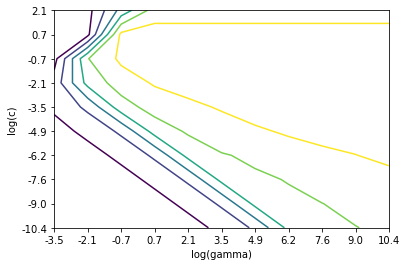

In [20]:
# plot contour map 
plt.contour(df_score)
plt.xticks(np.arange(11), ['{0:.1f}'.format(np.log(x)) for x in df_score.columns.values])
plt.yticks(np.arange(10), ['{0:.1f}'.format(np.log(x)) for x in df_score.index])
plt.xlabel('log(gamma)')
plt.ylabel('log(c)')
plt.show()

In [21]:
# find grid search

# intialize the grid
param_grid2 = {'C': [2**(3+i/100) for i in range(0,425,25)], \
               'gamma': [2**(1-i/100) for i in range(0,425,25)], 'kernel': ['rbf']}

# performance score
scores = 'accuracy'

print("# Tuning hyper-parameters for %s" % score)
print()

clf = GridSearchCV(SVC(), param_grid2, cv=5, scoring = score)
clf.fit(x_train2, y_train2)

print("Best parameters set found on development set:")
print()
print(clf.best_params_, clf.best_score_)
print()
print("Grid scores on development set:")
print()


means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
params = clf.cv_results_['params']


print("Detailed classification report:")
print("The classification report")
print()
y_true, y_pred = y_test2, clf.predict(x_test2)
print(classification_report(y_true, y_pred))
print()
print("The accuracy score is %.4f" % accuracy_score(y_true, y_pred))
print()

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'C': 8.0, 'gamma': 0.5, 'kernel': 'rbf'} 0.9949494949494949

Grid scores on development set:

Detailed classification report:
The classification report

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        25
          1       1.00      1.00      1.00        15
          2       1.00      1.00      1.00        17
          3       1.00      1.00      1.00        19
          4       1.00      0.88      0.94        17
          5       0.89      0.94      0.92        18
          6       1.00      1.00      1.00        15
          7       1.00      1.00      1.00        13
          8       1.00      1.00      1.00        22
          9       1.00      1.00      1.00        21
         10       0.94      1.00      0.97        16

avg / total       0.99      0.98      0.98       198


The accuracy score is 0.9848



# Problem 3

In [22]:
## load data
df3_train = pd.read_csv(r'sat.trn', sep= '\s+', header = None)
df3_test = pd.read_csv(r'sat.tst', sep= '\s+', header = None)

#df3_train.iloc[:, 36] = df3_train.iloc[:, 36].astype('category')
#df3_test.iloc[:, 36] = df3_test.iloc[:, 36].astype('category')

# check missing values 
sum(df3_train.isnull().sum()), sum(df3_test.isnull().sum())

(0, 0)

In [23]:
## change data to array 
df3_train = np.array(df3_train)
df3_test = np.array(df3_test)

x_train3, y_train3 = df3_train[:, :36], df3_train[:, 36]
x_test3, y_test3 = df3_train[:, :36], df3_train[:, 36]

In [24]:
## standardlize data
x_train3 = MinMaxScaler().fit_transform(x_train3)
x_test3 = MinMaxScaler().fit_transform(x_test3)

In [25]:
# intialize the grid
param_grid3 = {'C': [2**-5, 2**-3, 2**-1, 2**1, 2**3, 2**5, 2**7, 2**9, 2**11, 2**13, 2**15], \
   'gamma': [2**-15, 2**-13, 2**-11, 2**-9, 2**-7, 2**-5, 2**-3, 2**-1, 2**1, 2**3], 'kernel': ['rbf']}

# performance score
score = 'accuracy'

print("# Tuning hyper-parameters for %s" % score)
print()

clf = GridSearchCV(SVC(), param_grid3, cv=5, scoring=score)
clf.fit(x_train3, y_train3)

print("Best parameters set found on development set:")
print()
print(clf.best_params_, clf.best_score_)
print()

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
params = clf.cv_results_['params']

## DataFrame
d = {}

idx = param_grid3['gamma']

for mean, std, params in zip(means, stds, params):
    if params['C'] not in d.keys():
        d[params['C']] = [mean]
    else:
        d[params['C']].append(mean)

df_score = pd.DataFrame(d, index=idx)
df_score

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'C': 8, 'gamma': 0.5, 'kernel': 'rbf'} 0.8579481397970687



,0.03125,0.125,0.5,2.0,8.0,32.0,128.0,512.0,2048.0,8192.0,32768.0
0.000031,0.241714,0.241714,0.241714,0.241714,0.281398,0.721082,0.777903,0.823675,0.829312,0.835626,0.835175
0.000122,0.241714,0.241714,0.241714,0.281398,0.721082,0.777678,0.823675,0.829312,0.835400,0.834724,0.830665
0.000488,0.241714,0.241714,0.281172,0.721082,0.777678,0.823675,0.829087,0.835851,0.834273,0.830665,0.829312
0.001953,0.241714,0.279820,0.721082,0.777678,0.823901,0.829312,0.835851,0.835175,0.833596,0.834724,0.836753
0.007812,0.273732,0.721082,0.777678,0.824126,0.829989,0.838106,0.839233,0.838331,0.842841,0.844645,0.847125
0.031250,0.720857,0.777001,0.824352,0.829989,0.840586,0.840361,0.845772,0.850507,0.846900,0.841037,0.837430
0.125000,0.774972,0.826381,0.837204,0.844419,0.849154,0.854791,0.854566,0.847125,0.844870,0.839910,0.836979
0.500000,0.828861,0.841488,0.848027,0.852086,0.857948,0.851860,0.850733,0.844870,0.841037,0.840812,0.840135
2.000000,0.841939,0.848253,0.849831,0.853664,0.853439,0.846900,0.840135,0.839910,0.839910,0.839910,0.839910
8.000000,0.723337,0.818940,0.839233,0.846449,0.841263,0.839459,0.839459,0.839459,0.839459,0.839459,0.839459


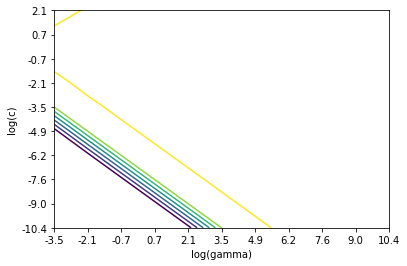

In [26]:
# plot contour map 
plt.contour(df_score)
plt.xticks(np.arange(11), ['{0:.1f}'.format(np.log(x)) for x in df_score.columns.values])
plt.yticks(np.arange(10), ['{0:.1f}'.format(np.log(x)) for x in df_score.index])
plt.xlabel('log(gamma)')
plt.ylabel('log(c)')
plt.show()

In [27]:
# find grid search

param_grid3 = {'C': [2**(1+i/100) for i in range(0,425,25)], \
               'gamma': [2**(1-i/100) for i in range(0,425,25)], 'kernel': ['rbf']}

# performance score
scores = 'accuracy'

print("# Tuning hyper-parameters for %s" % score)
print()

clf = GridSearchCV(SVC(), param_grid3, cv=5, scoring = score)
clf.fit(x_train3, y_train3)

print("Best parameters set found on development set:")
print()
print(clf.best_params_, clf.best_score_)
print()
print("Grid scores on development set:")
print()


means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
params = clf.cv_results_['params']


print("Detailed classification report:")
print("The classification report")
print()
y_true, y_pred = y_test3, clf.predict(x_test3)
print(classification_report(y_true, y_pred))
print()
print("The accuracy score is %.4f" % accuracy_score(y_true, y_pred))
print()

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'C': 11.313708498984761, 'gamma': 0.42044820762685725, 'kernel': 'rbf'} 0.8586245772266066

Grid scores on development set:

Detailed classification report:
The classification report

             precision    recall  f1-score   support

          1       0.99      0.99      0.99      1072
          2       1.00      0.99      0.99       479
          3       0.89      0.98      0.93       961
          4       0.77      0.62      0.69       415
          5       0.95      0.93      0.94       470
          7       0.91      0.91      0.91      1038

avg / total       0.93      0.93      0.93      4435


The accuracy score is 0.9294

